# ¿Qué es Spark?
Es un framework de desarrollo de procesos de Big Data. Preocupado por la velocidad del proceso.

## Spark vs Hadoop
* Spark se enfoca en procesamiento de datos desde RAM.
* Posee naturalmente módulo para ML, Straming y Grafos.
* No depende de un sistema de archivos.

## RDDs y DataFrames
La diferencia reside en la estructura que poseen.
Los RDD son el componente mínimo con el cual podemos comunicarnos con Spark. UN RDD es como el lenguaje emsamblador de Spark

### Características de los RDD
* Principal abstracción de datos: Es la unidad básica. 
* Dristribución: Los RDD se distribuyen y particionan a lo largo del clúster.
* Creación simple: AL no poseer estructura formalmente, adoptan la más intuitiva.
* Inmutable: Una vez creadas, no se pueden modificar.
* Ejecución perezosa: A manos se realice una acción, todo lo que e escrito de código, no corre.

### Transformación y acciones
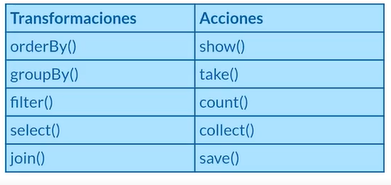
Todo lo que sea transformaciones las vamos a poder escribir sin problema. Una vez que realice una acción, vamos a darle vida a lo que estamos creando.

### DataFrame
Capa superior que existe sobre los RDDs, estos si poseen estructura de tipos de datos. Poseen una mejor implementación, lo cual los hace preferibles. A su vez, son más faciles de crear, lo podemos hacer desde un RDD, un archivo o una base de datos.

### ¿Cuandp usar un RDD?
* Cuadno te interesa controlar el flujo de Spark.
* Si eres usuario de Pythonm convertir a RDD un conjunto permite mejor control de los datos.
* Estas conectandote a versiones antiguas de Spark

### ¿Cuando usar DataFrames?
* Si poseemos semánticas de datos complicados
* Vamos a realizar tareas de alto nivel como filtros, mapeos, agregaciones, promedios o sumas.
* Su vamos a uasr sentencias SQL-like.

Todas las aplicaciones de Spark poseen un manejador central deel programa (Driver) y varios ejecutores que se crean a lo largo del clústerm estas son las computadoras que realizarán las tareas en paralelo y finalmente devolverán los valores al dirves, la aplicación central.

Una de las grandes ventajas de los RDD es la compulcación segura; pór su particularidad de ejecución perezosa, se calcula si se generará un error o no antes de ehecytarsem, lo cual permite identificar prioblemas antes de lanzas la aplicación. El pero que podemos encontrarcon los RDD es que no son correctamente tratados por el Garbage Collector y cuando las logircas de operaciones se hacen complejas, su uso puede resultar poro práctico aquí entra los DataFrames.

Los DataFrames implementan un sistema llamado Catalyst, el cual es un motor de optimización d eplaens de ejecución, parecido al que usan las bases de datos, pero diseñado para la cantidad de datos propia de Spark, aunado a eso, se tiene implementado un optimizador de memoria y consumo de CPU llamado Tungsten, el cual determina como se convertirán los planes lógicos creados por Catalyst a un plan físico. 

In [ ]:
import org.apache.spark.{SparkConf, SparkContext}

val conf = new SparkConf().setAppName("transformaciones y acciones").setMaster("local")
val sc = new SparkContext(conf)

# RDD funciones y explicaciones:
Para las explicaciones vamos a tener en cuenta que sc es el alias que va a tomar el contexto de SparkContext.

* sc.parallelize(); La función parallelize se utiliza para crear un Resilient Distributed Dataset (RDD) a partir de una colección de datos existente en la memoria del controlador. Esta función divide los datos en particiones paralelas que pueden ser procesadas en diferentes nodos de un clúster.Por ejemplo, si tienes una lista de números en tu programa y quieres distribuir esa lista a través de un clúster para realizar operaciones en paralelo, puedes usar la función parallelize para convertir esa lista en un RDD. Es importante tener en cuenta que los RDD son una abstracción fundamental en Spark que representan una colección inmutable y particionada de elementos que pueden ser procesados en paralelo.

* sc.collect(): Es una operación de acción que se utiliza para recuperar todos los elemetnos de un RDD al controlador del programa. Es útil cuando tenes en conjunto de resultados pequeños que cabe en la memoria del controlador y deseas hacer algo con esos datos en el lado del controlador, como imprimirlos para depuración o análisis.



In [5]:
// Crear un RDD
val data = Array(1, 2, 3, 4, 5)
val rdd = sc.parallelize(data)

data: Array[Int] = Array(1, 2, 3, 4, 5)
rdd: org.apache.spark.rdd.RDD[Int] = ParallelCollectionRDD[0] at parallelize at <console>:29


In [6]:
rdd.collect()

res0: Array[Int] = Array(1, 2, 3, 4, 5)


In [7]:
sc

res1: org.apache.spark.SparkContext = org.apache.spark.SparkContext@3955606b


In [8]:
val incrementRdd = rdd.map(_ + 1)

val result = incrementRdd.collect()

result.foreach(println)

2
3
4
5
6


incrementRdd: org.apache.spark.rdd.RDD[Int] = MapPartitionsRDD[1] at map at <console>:27
result: Array[Int] = Array(2, 3, 4, 5, 6)


In [11]:
!ls ./files

deporte.csv	 deportistaError.csv  modelo_relacional.jpg
deportista2.csv  evento.csv	      paises.csv
deportista.csv	 juegos.csv	      resultados.csv



In [16]:
val path = "./files"

val equiposOlimpicos = sc.textFile(path + "/paises.csv")
  .map(line => line.split(","))

path: String = ./files
equiposOlimpicos: org.apache.spark.rdd.RDD[Array[String]] = MapPartitionsRDD[7] at map at <console>:31


In [20]:
equiposOlimpicos.take(15) 
// take.(5) es una acción y nos muestra la cantidad de lineas que nos va a mostrar

res9: Array[Array[String]] = Array(Array(id, equipo, sigla), Array(1, 30. Februar, AUT), Array(2, A North American Team, MEX), Array(3, Acipactli, MEX), Array(4, Acturus, ARG), Array(5, Afghanistan, AFG), Array(6, Akatonbo, IRL), Array(7, Alain IV, SUI), Array(8, Albania, ALB), Array(9, Alcaid, POR), Array(10, Alcyon-6, FRA), Array(11, Alcyon-7, FRA), Array(12, Aldebaran, ITA), Array(13, Aldebaran II, ITA), Array(14, Aletta, IRL))


In [21]:
equiposOlimpicos.take(15).foreach(arr => println(arr.mkString(", ")))
// Para verlo de una forma más humana vamos a usar un foreach
//  La función arr => println(arr.mkString(", ")) convierte cada array en una cadena, separando los elementos con comas, y luego imprime la cadena.

id, equipo, sigla
1, 30. Februar, AUT
2, A North American Team, MEX
3, Acipactli, MEX
4, Acturus, ARG
5, Afghanistan, AFG
6, Akatonbo, IRL
7, Alain IV, SUI
8, Albania, ALB
9, Alcaid, POR
10, Alcyon-6, FRA
11, Alcyon-7, FRA
12, Aldebaran, ITA
13, Aldebaran II, ITA
14, Aletta, IRL


In [22]:
// Vamos a contar cuantos paises tenemos en los juegos olimpicos
val count = equiposOlimpicos.map(x => x(2)).distinct.count

count: Long = 231


In [26]:
// Cuantos equipos posee cada país
val equiposPorPais = equiposOlimpicos.map(x => (x(2), x(1)))
  .groupByKey
  .mapValues(_.size)
  .take(50)

equiposPorPais: Array[(String, Int)] = Array((YAR,1), (BLR,3), (sigla,1), (ROU,3), (GHA,1), (IRI,1), (KIR,1), (ARU,1), (BRN,1), (FSM,1), (WIF,2), (COL,1), (MOZ,1), (CYP,1), (LCA,1), (SUD,1), (MKD,1), (RSA,9), (MDA,1), (CMR,1), (RUS,7), (ISR,3), (SVK,3), (LAO,1), (IRQ,1), (AHO,1), (TOG,1), (SMR,1), (ZAM,1), (MON,5), (URU,4), (HAI,1), (SGP,5), (NIG,1), (JAM,4), (HKG,4), (SLE,1), (TKM,1), (GER,40), (GBS,1), (UAR,1), (CUB,7), (ERI,1), (DMA,1), (MEX,9), (ISL,1), (EUN,4), (CIV,1), (NFL,1), (CRC,1))
